In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd 
from iminuit import Minuit
from iminuit.cost import LeastSquares
import iminuit


In [115]:
def exp(x,a,b,c):
    return np.exp(-x/b)*a+c
def frontselect(lista, fronte=0):
    result = []
    for i in lista:
        if i[2]==fronte:
            result.append(i)
    return result
def convtime(x, a=1.044, b= -159):
    return a*x+b
def fromhist(x):
    l = len(x)
    xnew = []
    for i in range(l-1):
        xnew.append((x[i]+x[i+1])/2)
    return xnew
def first_zero(y):
    l = len(y)
    re = -1
    i = 0
    while i<l:

        if y[i] == 0:
            
            re = i
            break
        i = i+1
    
    #if there is no zero, the function returns -1
    if re ==-1:
        print("There's no zero in the list!")
    return re
        

In [116]:
first_zero([1,2,3,0,4])

3

0 leading
1 trailing

In [117]:
df = pd.DataFrame(columns= ["Canale 0","Canale 3","Canale 4","Canale 6","Canale 8" ])
fname = "seconda presa dati.txt"
file = open(fname, "r")
n = 0
q = 0
col = 0
car = 0
locdict = {}
events = []
for f in file: 
    #print(f)
    #print(df)
    if q ==4:#parte di programma che mette il dizionario nella lista
        k = locdict.keys()
        for h in k:
            lista = locdict[h]
            lista_int= [int(y) for y in lista]
            events.append(lista_int)
        #for nr in k: ci ho un po' provato a mettere nel dataframe, senza successo. Per ora ci basta pensare alla lista
            
           # try:
           #     print("GOING")
           #     print(locdict[nr])
           #     print(df)
           #     df.loc[len(df), "event"+str(nr)] = locdict[nr]
           # except KeyError:
           #     print("AIUTO")
           #     cose = [np.nan for i in range(len(df.index))]
           #     toadd = cose+locdict[nr]
           #     title = "event "+str(nr)
           #     df[title] = toadd
                
        locdict = {}
        q = 0
        col =0
    for i in range(len(f)):
        #print(locdict)
        #print("f_i="+str(f[i]))
        #print("col="+str(col))
        #print("car="+str(car))
        #print("q"+str(q))
        if f[i] == "\n":
            q+=1
            col = 0
            car = 0            
            n+=1
            break
        elif f[i] == "\t":
            col += 1
            car =0 
        else:
            if car ==0 and q == 0:
                locdict[col]=[f[i]]
                car= 1
            elif car ==0:
                locdict[col].append(f[i])
                car +=1
            else:
                #print(locdict)
                locdict[col][q]+=f[i]
                car+=1
                
                
            

file.close()


In [118]:
print(n)

4501337


In [119]:

dict_tot= {}
for ev in events:
    ev[3]= convtime(ev[3])
    if ev[1] not in dict_tot.keys():
        dict_tot[ev[1]]= [ev]
    else:
        dict_tot[ev[1]].append(ev)

## Legenda per i vari canali
* 0 Up
* 3 CsI
* 4 Down
* 6 Coincidenza (110)
* 8 Coincidenza (01X)

## Scintillatore up

leading


In [120]:
times_all=[]
for i in dict_tot.keys():
    for j in dict_tot[i]:
        times_all.append(j[3])

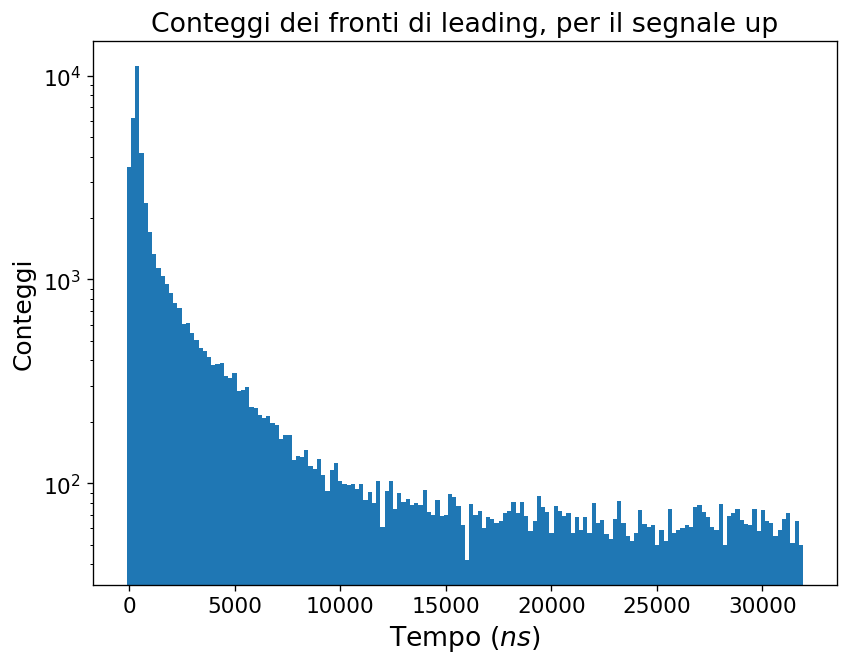

In [121]:
plt.figure(figsize=(8,6), dpi = 120)
plt.yscale("log")
plt.xlabel("Tempo ($ns$)", fontsize = 16)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
up_0 = frontselect(dict_tot[0],0)
up0_t = [i[3] for i in up_0]
plt.title("Conteggi dei fronti di leading, per il segnale up", fontsize = 16)
yup0,xup0, oup0 = plt.hist(up0_t, bins =160)
xup0_adapt = fromhist(xup0)
valup, covup = curve_fit(exp, xup0_adapt[2:],yup0[2:], (5000,3000,100),[np.sqrt(i) for i in yup0[2:]])
#plt.plot(xup0_adapt, [exp(i, valup[0], valup[1], valup[2]) for i in xup0_adapt])


In [122]:
sum (yup0)

53787.0

[2]
371.1725625


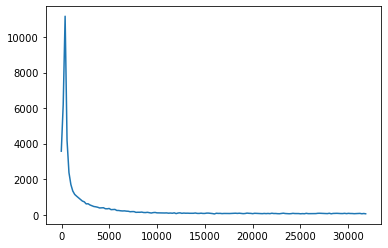

In [123]:
plt.plot(xup0_adapt, yup0)
m = max(yup0)
print(np.where(yup0 == m)[0])
print(xup0_adapt[2])

In [124]:
lim = 10000
yup0_sel =[]
for i in up0_t:
    if i<lim:
        yup0_sel.append(i)

Text(0.5, 1.0, 'Conteggi del fronte leading, per il segnale up (<10000 ns)')

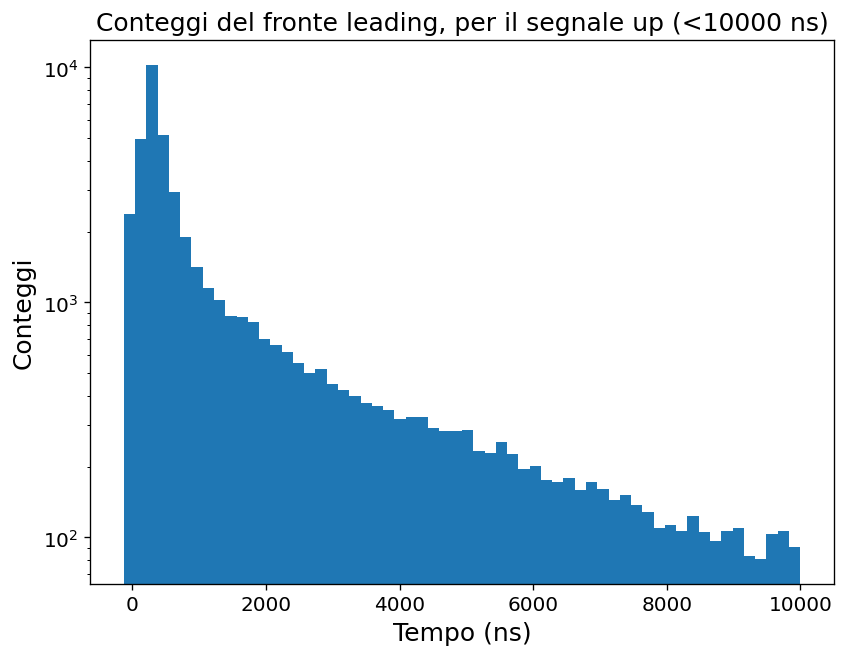

In [125]:
plt.figure(figsize=(8,6), dpi = 120)
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yscale("log")
plt.yticks(fontsize = 12)
yselup0, xselup0, qqqqq = plt.hist(yup0_sel, bins = 60)
plt.title("Conteggi del fronte leading, per il segnale up (<"+str(lim)+" ns)", fontsize = 15)


In [126]:
sum(yselup0)/sum(yup0)

0.8565452618662502

trailing


In [127]:
times_all=[]
for i in dict_tot.keys():
    for j in dict_tot[i]:
        times_all.append(j[3])

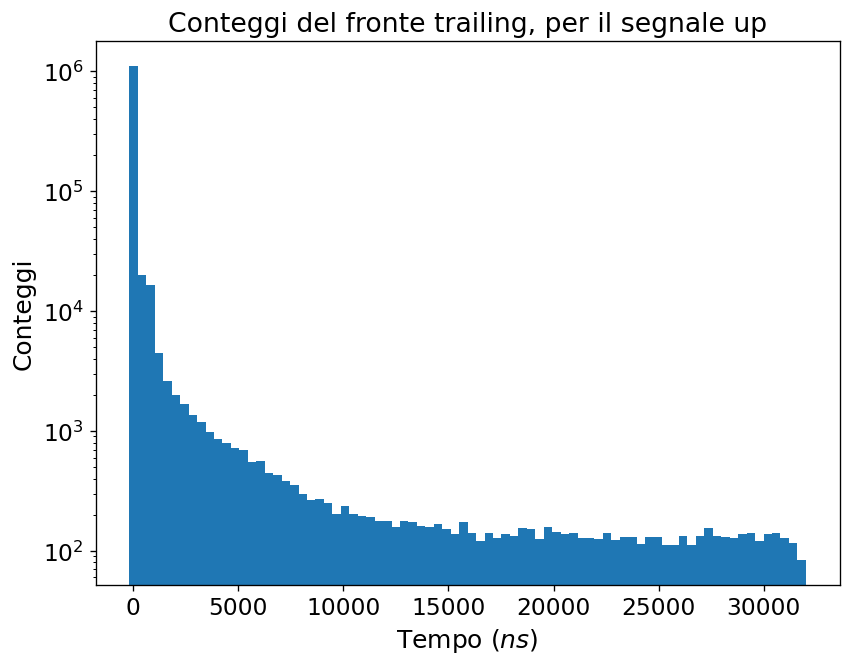

In [128]:
plt.figure(figsize=(8,6), dpi = 120)
plt.yscale("log")
plt.xlabel("Tempo ($ns$)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
up_1 = frontselect(dict_tot[0],1)
up1_t = [i[3] for i in up_1]
plt.title("Conteggi del fronte trailing, per il segnale up", fontsize = 16)
yup1,xup1, oup1 = plt.hist(up1_t, bins =80)


In [129]:
lim = 600
yup1_sel =[]
for i in up1_t:
    if i<lim:
        yup1_sel.append(i)

Text(0.5, 1.0, 'Conteggi del fronte trailing, per il segnale up (<600 ms)')

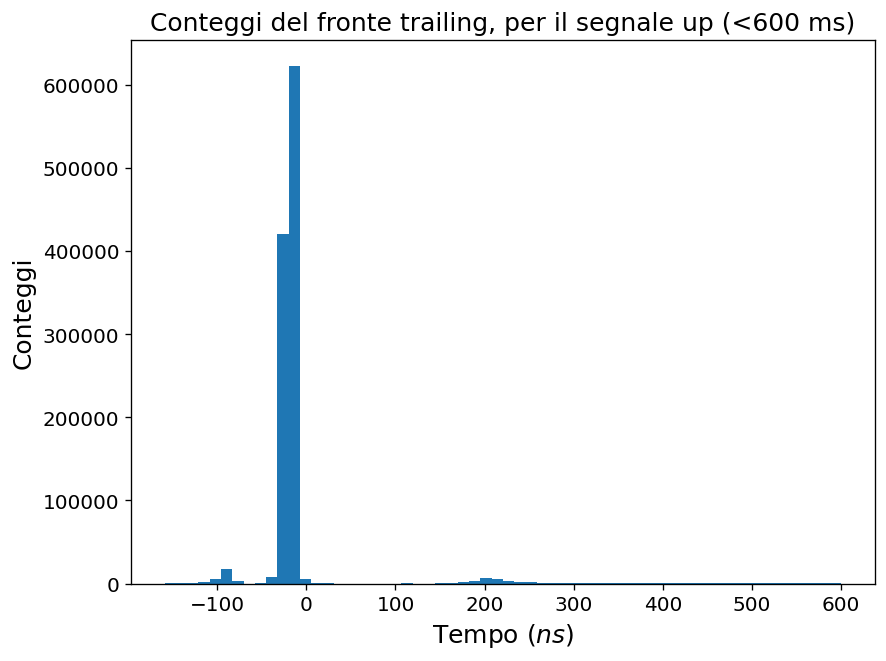

In [130]:
plt.figure(figsize=(8,6), dpi = 120)
plt.xlabel("Tempo ($ns$)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
yselup1, xselup1, qqqqq1 = plt.hist(yup1_sel, bins = 60)
plt.title("Conteggi del fronte trailing, per il segnale up (<"+str(lim)+" ms)", fontsize = 15)


In [131]:
sum(yselup1)/sum(yup1)

0.9601954637810873

## Analisi CSI


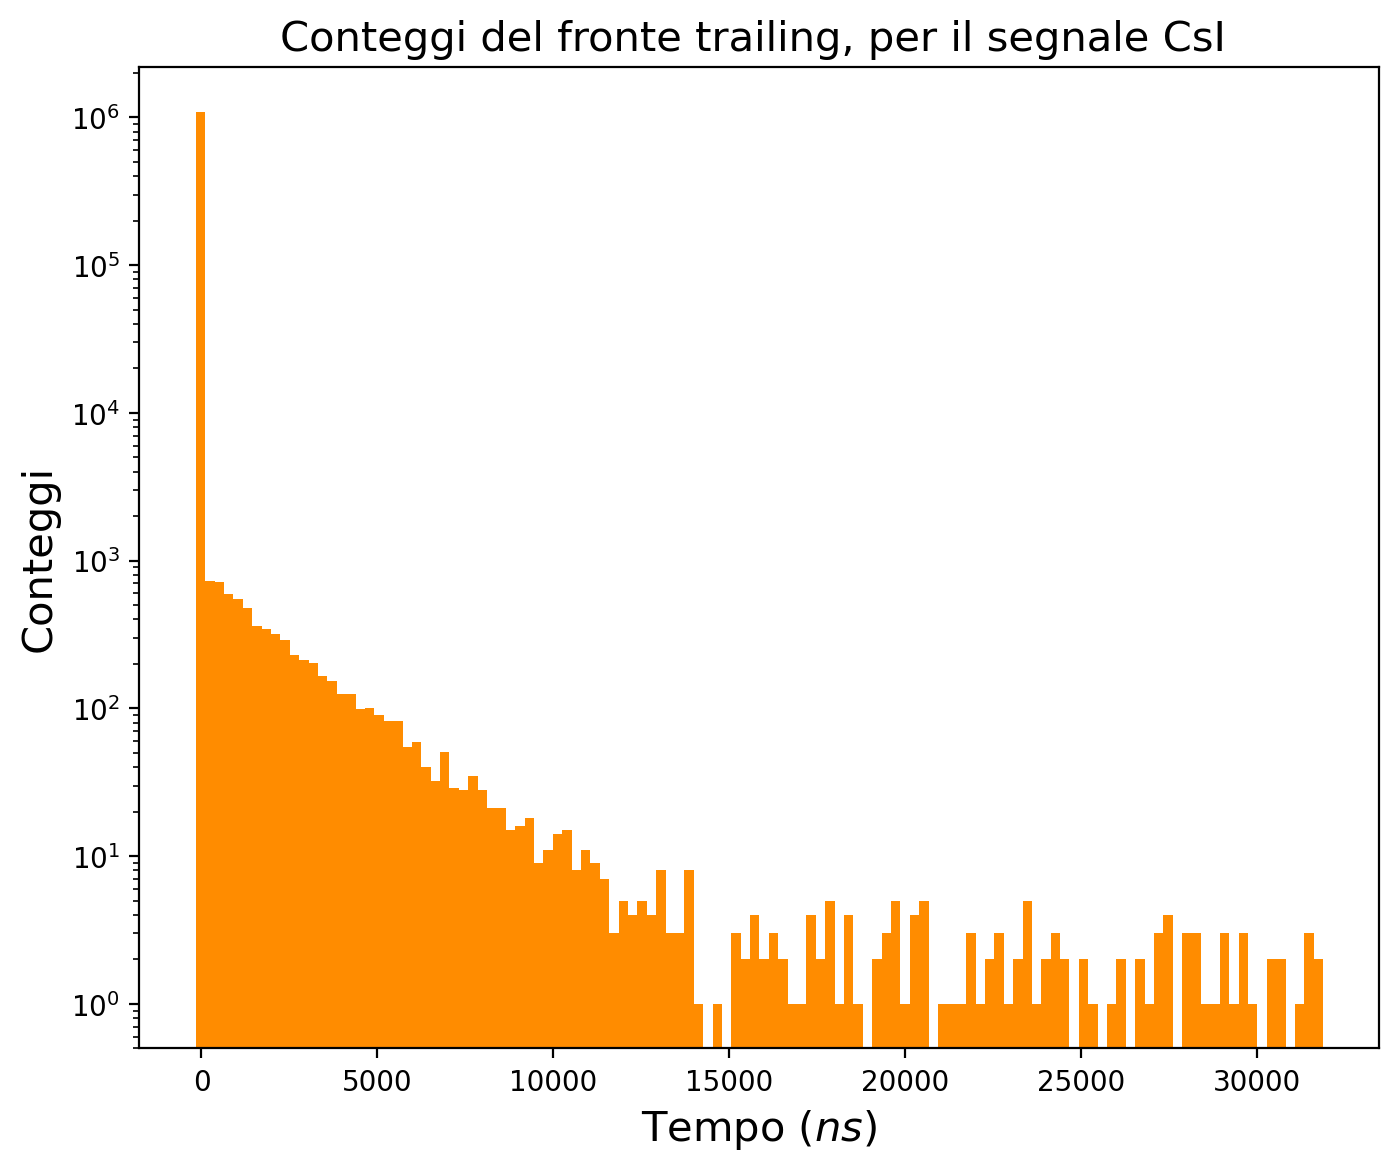

In [132]:
plt.figure(figsize=(8,6.5), dpi = 200)
csi = frontselect([i for i in dict_tot[3]],1)
plt.xlabel("Tempo ($ns$)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.yscale("log")
ycsi,xcsi, ocsi = plt.hist([i[3] for i in csi], bins =120, color = "darkorange")
plt.title("Conteggi del fronte trailing, per il segnale CsI ", fontsize = 15)
p_csi, s_csi = curve_fit(exp, fromhist(xcsi)[1:], ycsi[1:], (30000,2000,10))
#plt.plot(fromhist(xcsi), [exp(i, *p_csi) for i in fromhist(xcsi) ])

In [133]:
sum(ycsi)

1101160.0

Adesso seleziono solo i csi sotto i 10, e vediamo quanto rappresentano del totale


4.157568723742177

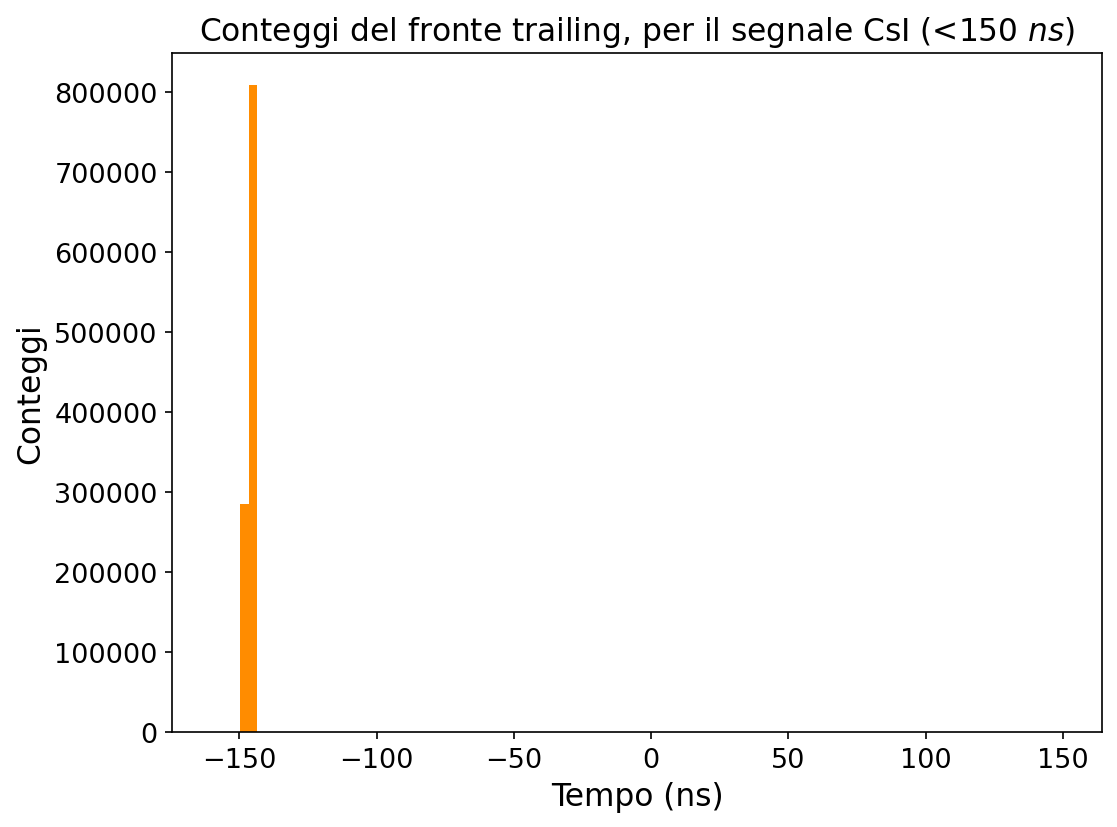

In [134]:
csi_selected = []
lim = 150
for i in csi:
    if i[3]<lim:
        csi_selected.append(i[3])
plt.figure(figsize=(8,6), dpi = 150)
csisy, csix, otcsh= plt.hist(csi_selected, color = "darkorange", bins = 100)
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Conteggi del fronte trailing, per il segnale CsI (<"+str(lim)+" $ns$)", fontsize = 15)

np.std(csi_selected)

In [135]:
sum(csisy)/sum(ycsi)

0.9939681790112245

Insomma il 99% degli eventi è sotto i 10. 

## Down scint

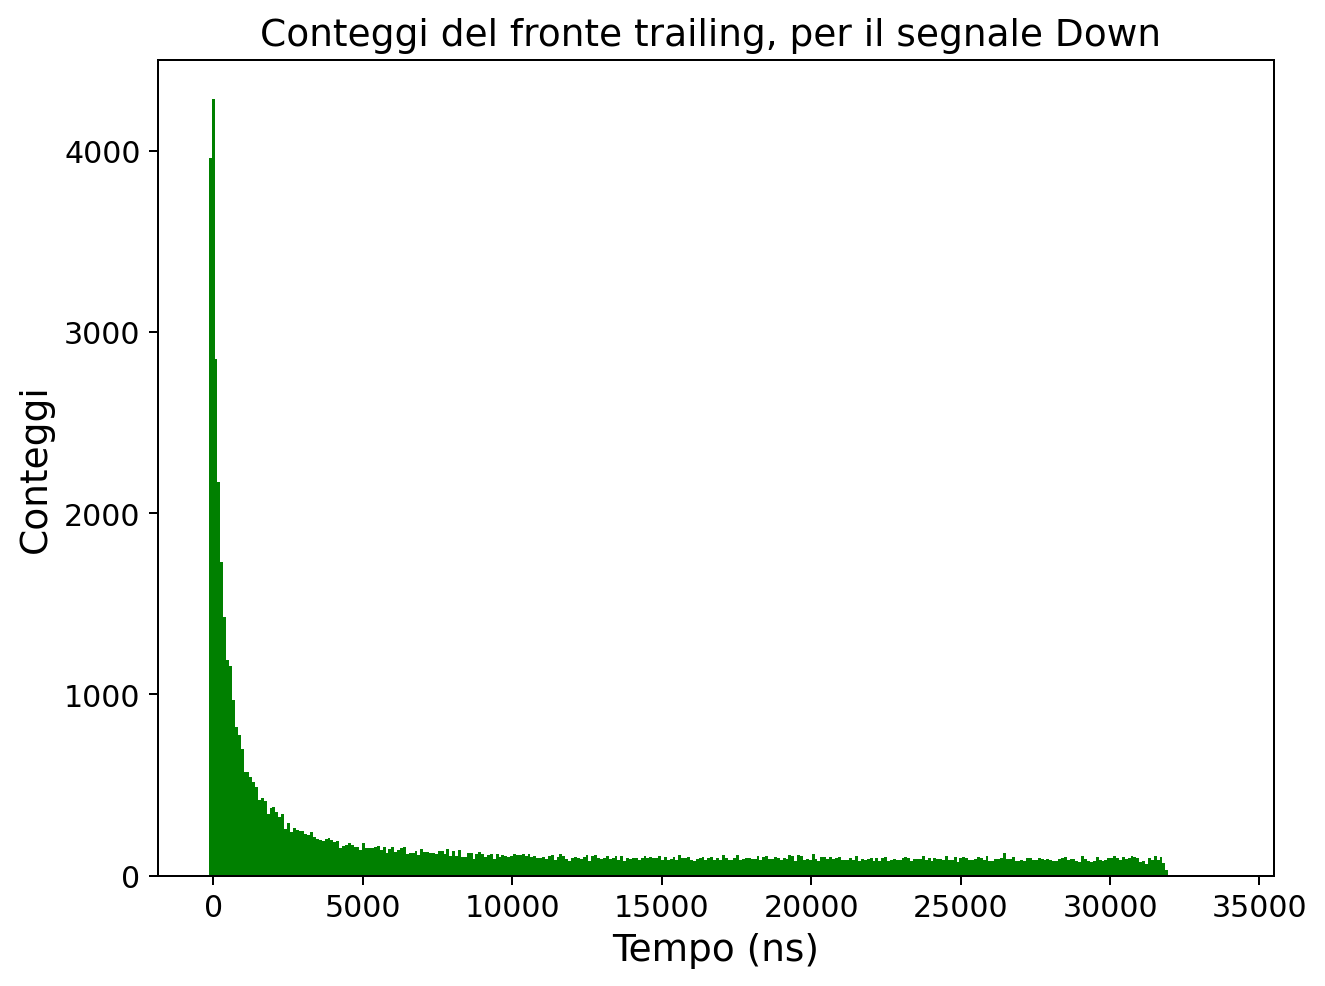

In [136]:
plt.figure(figsize=(8,6), dpi = 180)
downs= frontselect([i for i in dict_tot[4]],0)

ydw,xdw, odw = plt.hist([i[3] for i in downs], bins =350, color = "green")
plt.title("Conteggi del fronte trailing, per il segnale Down ", fontsize = 15)

#plt.yscale("log")
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
p_dw, s_dw = curve_fit(exp, fromhist(xdw)[1:20], ydw[1:20], (30000,2000,10), [np.sqrt(i) for i in ydw[1:20] ])
#plt.plot(fromhist(xdw), [exp(i, *p_dw) for i in fromhist(xdw) ], color= "red")
plt.show()

In [137]:
p_dw

array([3290.04775864,  331.39950487,  444.06241618])

Text(0.5, 1.0, 'Conteggi del fronte trailing, per il segnale Down (<10000 $ns$)')

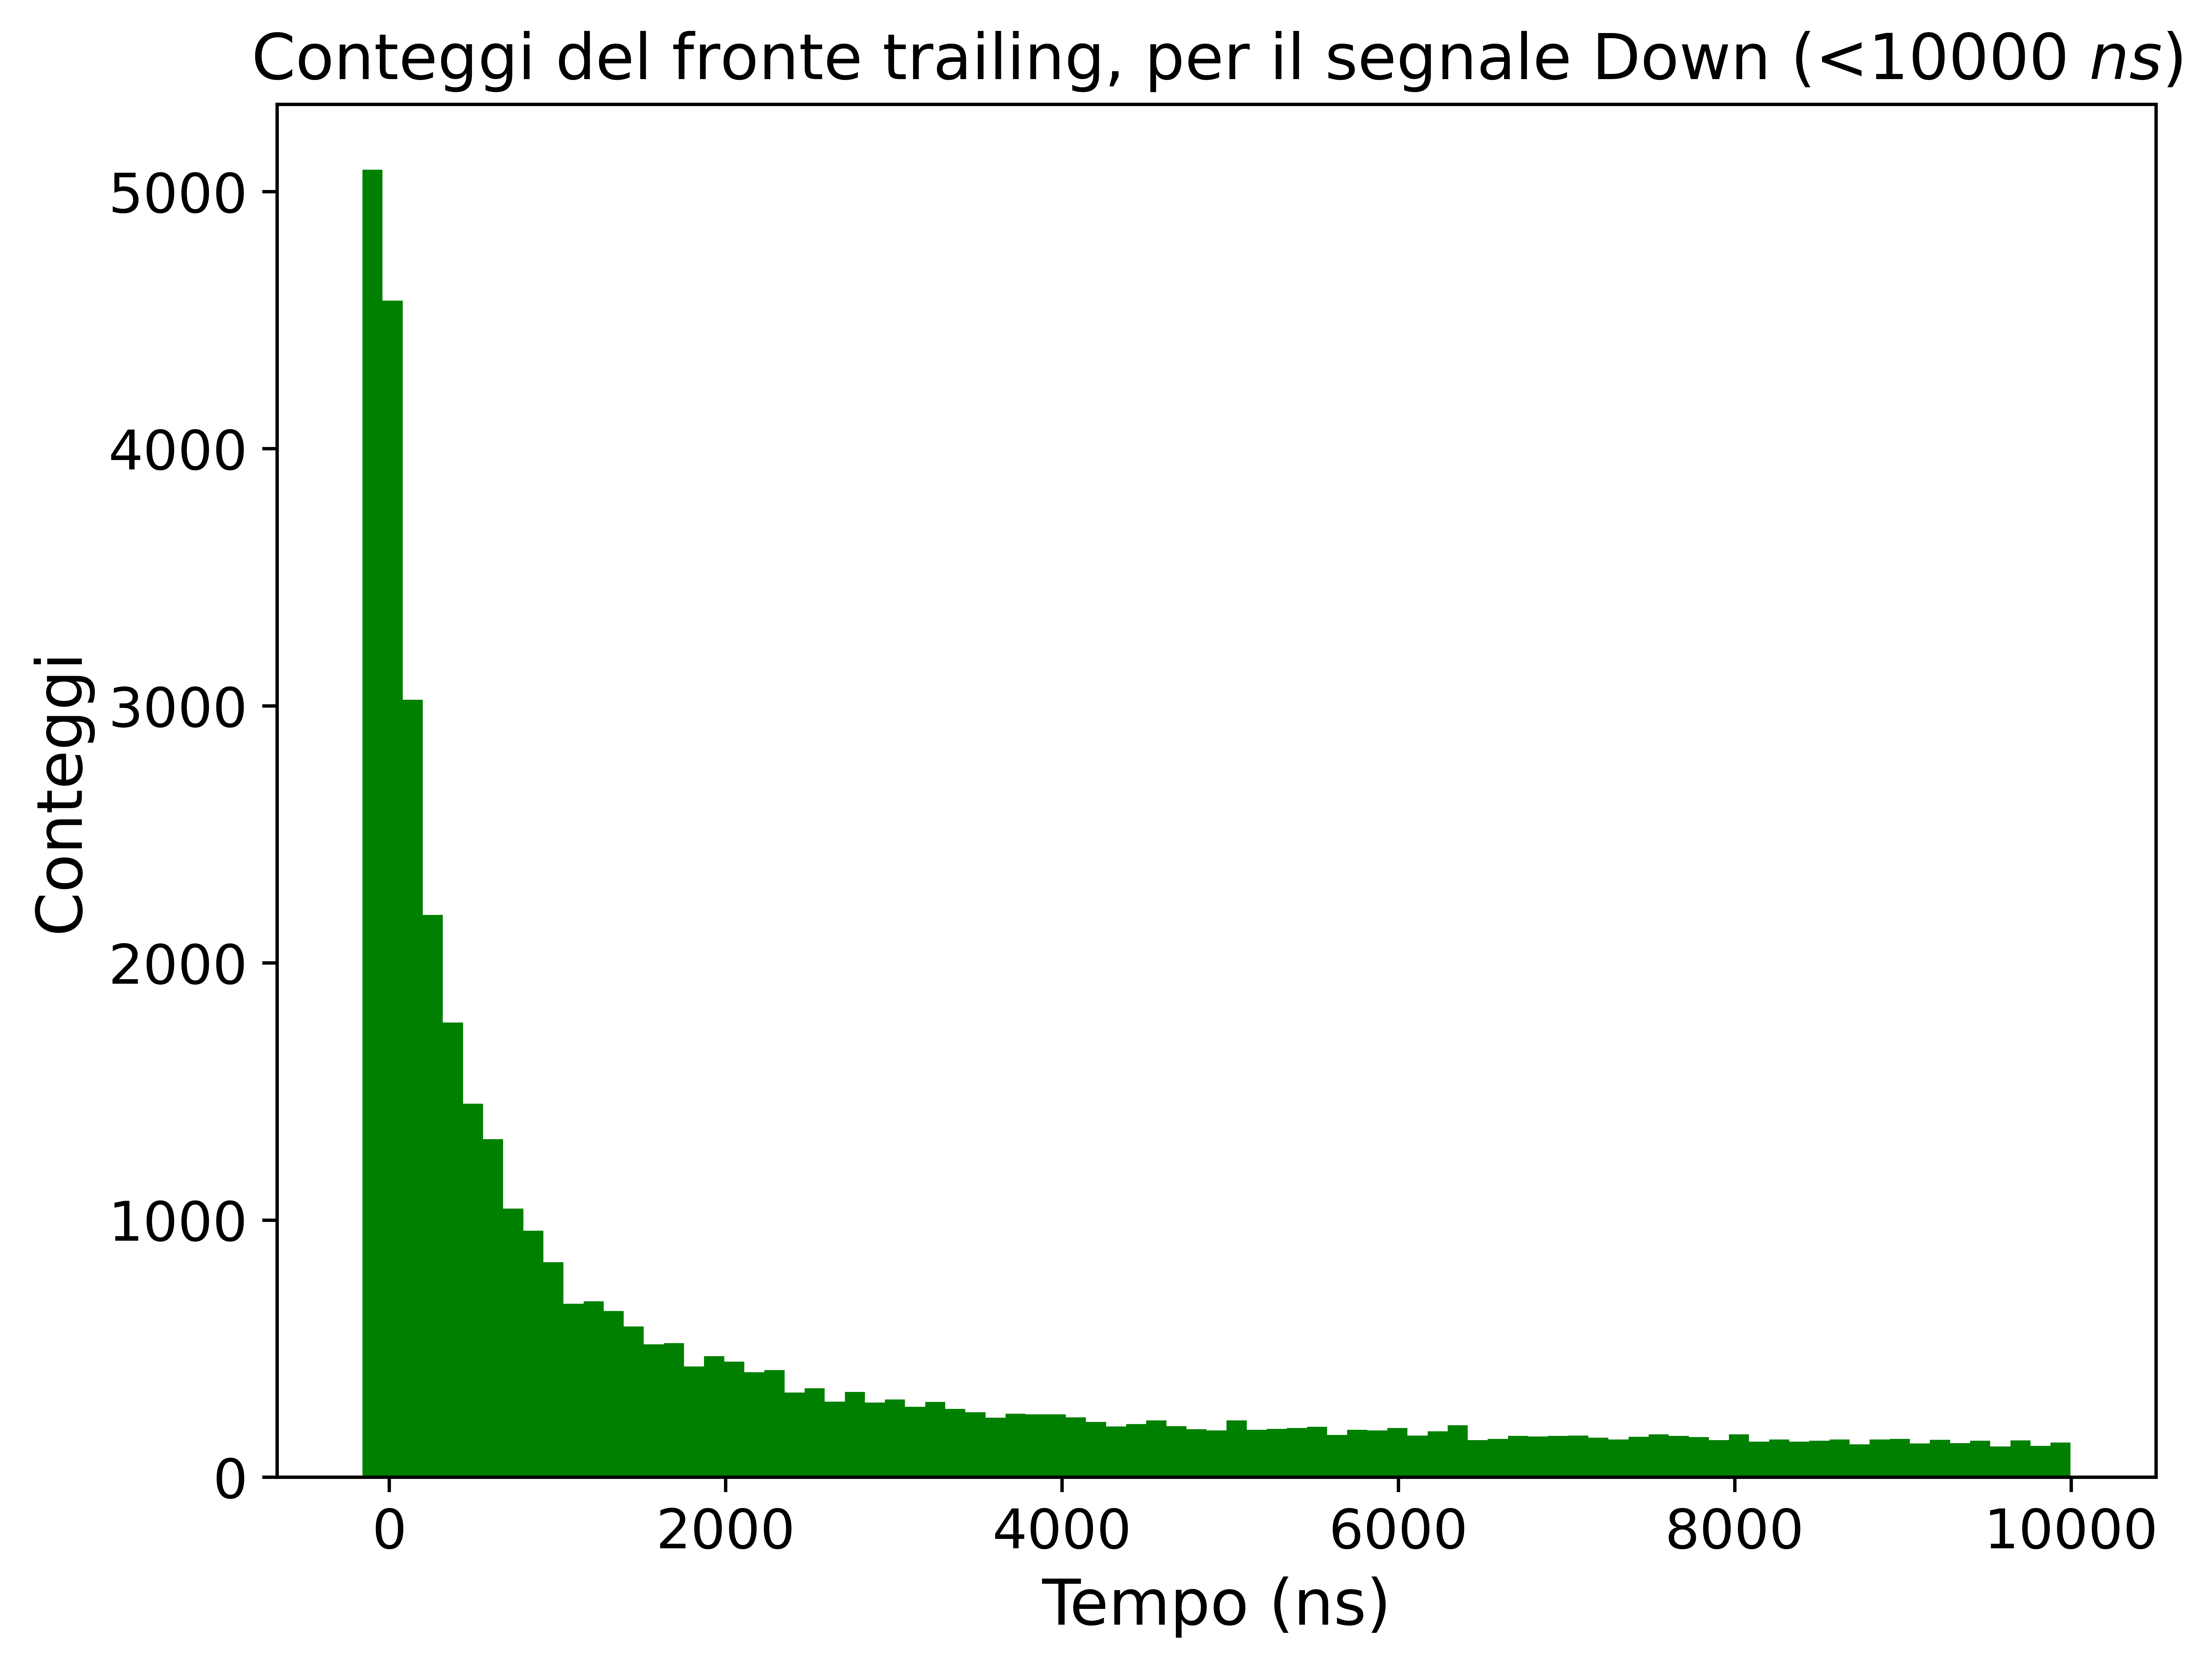

In [138]:
dw_selected = []
lim = 10000
for i in downs:
    if i[3]<lim:
        dw_selected.append(i[3])
plt.figure(figsize=(8,6), dpi = 1000)
dwsy, dwsx, otcsh= plt.hist(dw_selected, color = "green", bins = 85)
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Conteggi del fronte trailing, per il segnale Down (<"+str(lim)+" $ns$)", fontsize = 15)


In [139]:
sum(dwsy)/sum(ydw)

0.6545271269936755

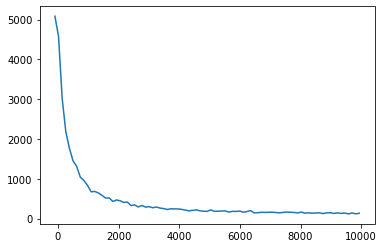

In [140]:
plt.plot(fromhist(dwsx),dwsy)

In [141]:
sum(dwsy)/sum(ydw)

0.6545271269936755

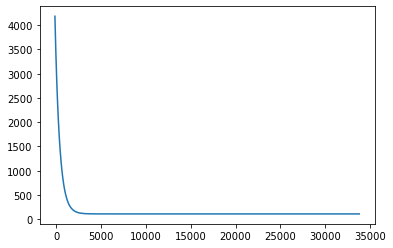

In [142]:
##### ydw,xdw, odw = plt.hist([i[3] for i in dict_tot[4]], bins =80)
paramsd, covd = curve_fit(f = exp,xdata = xdw[0:(len(xdw)-1)],ydata = ydw, p0 = (70,2000,0))
modeld = [exp(i, *paramsd) for i in xdw]
plt.plot(xdw, modeld)

## Analisi delle coincidenze


650


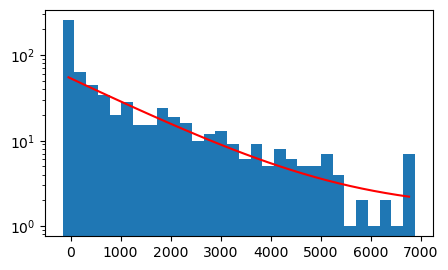

In [143]:
plt.figure(figsize=(5,3), dpi = 100)
coinc_100 = []
for i in frontselect(dict_tot[6],0):
    if i[2]==0:
        if i[3]<7000:
           coinc_100.append(i[3])
print(len(coinc_100))
plt.yscale("log")
y6,x6, o6 = plt.hist(coinc_100, bins = 30)
params6, cov6= curve_fit(f = exp,xdata = fromhist(x6)[1:],ydata =[i for i in  y6[1:]], p0 = (70,1300,10), sigma = [1+i**0.5 for i in  y6[1:]] )
plt.plot(fromhist(x6), [exp(i, *params6) for i in fromhist(x6) ], color= "red")

In [144]:
cov6

array([[ 3.11646237e+01, -9.76078692e+02,  2.11767108e+00],
       [-9.76078692e+02,  6.17398049e+04, -2.26820500e+02],
       [ 2.11767108e+00, -2.26820500e+02,  1.29957247e+00]])

In [145]:
y6 = [i-params6[2] for i in y6]

In [146]:
params6, cov6= curve_fit(f = exp,xdata = fromhist(x6)[1:],ydata =[i for i in  y6[1:]], p0 = (70,1300,10))


In [147]:
params6

array([  63.74207324, 1001.485137  ,    3.33638953])

In [148]:
print(first_zero(y6))

There's no zero in the list!
-1


In [149]:
first_zero([1,2,3,0,4])

3

In [150]:
params6

array([  63.74207324, 1001.485137  ,    3.33638953])

In [151]:
sum(y6)

603.139440988146

In [152]:
params6_c, cov6_c = curve_fit(f = exp,xdata = fromhist(x6)[1:11],ydata =[i-0.837 for i in  y6[1:11]], p0 = (70,2000,0), sigma = [np.sqrt(i-0.837) for i in  y6[1:11]])

In [153]:
params6_c

array([ 82.12910608, 376.1172934 ,  14.29409549])

Possiamo fare un fit sulle coincidenze per ottenere la vita media del muone. Per eliminare le casuali dalle coincidenze, possiamo sottrarre, ai dati il coefficiente costante ottenuto dal fit. 
Quindi 

In [154]:
params6

array([  63.74207324, 1001.485137  ,    3.33638953])

### 01X


In [155]:
def expnc(x,a,b):
    return a*np.exp(-x/b)

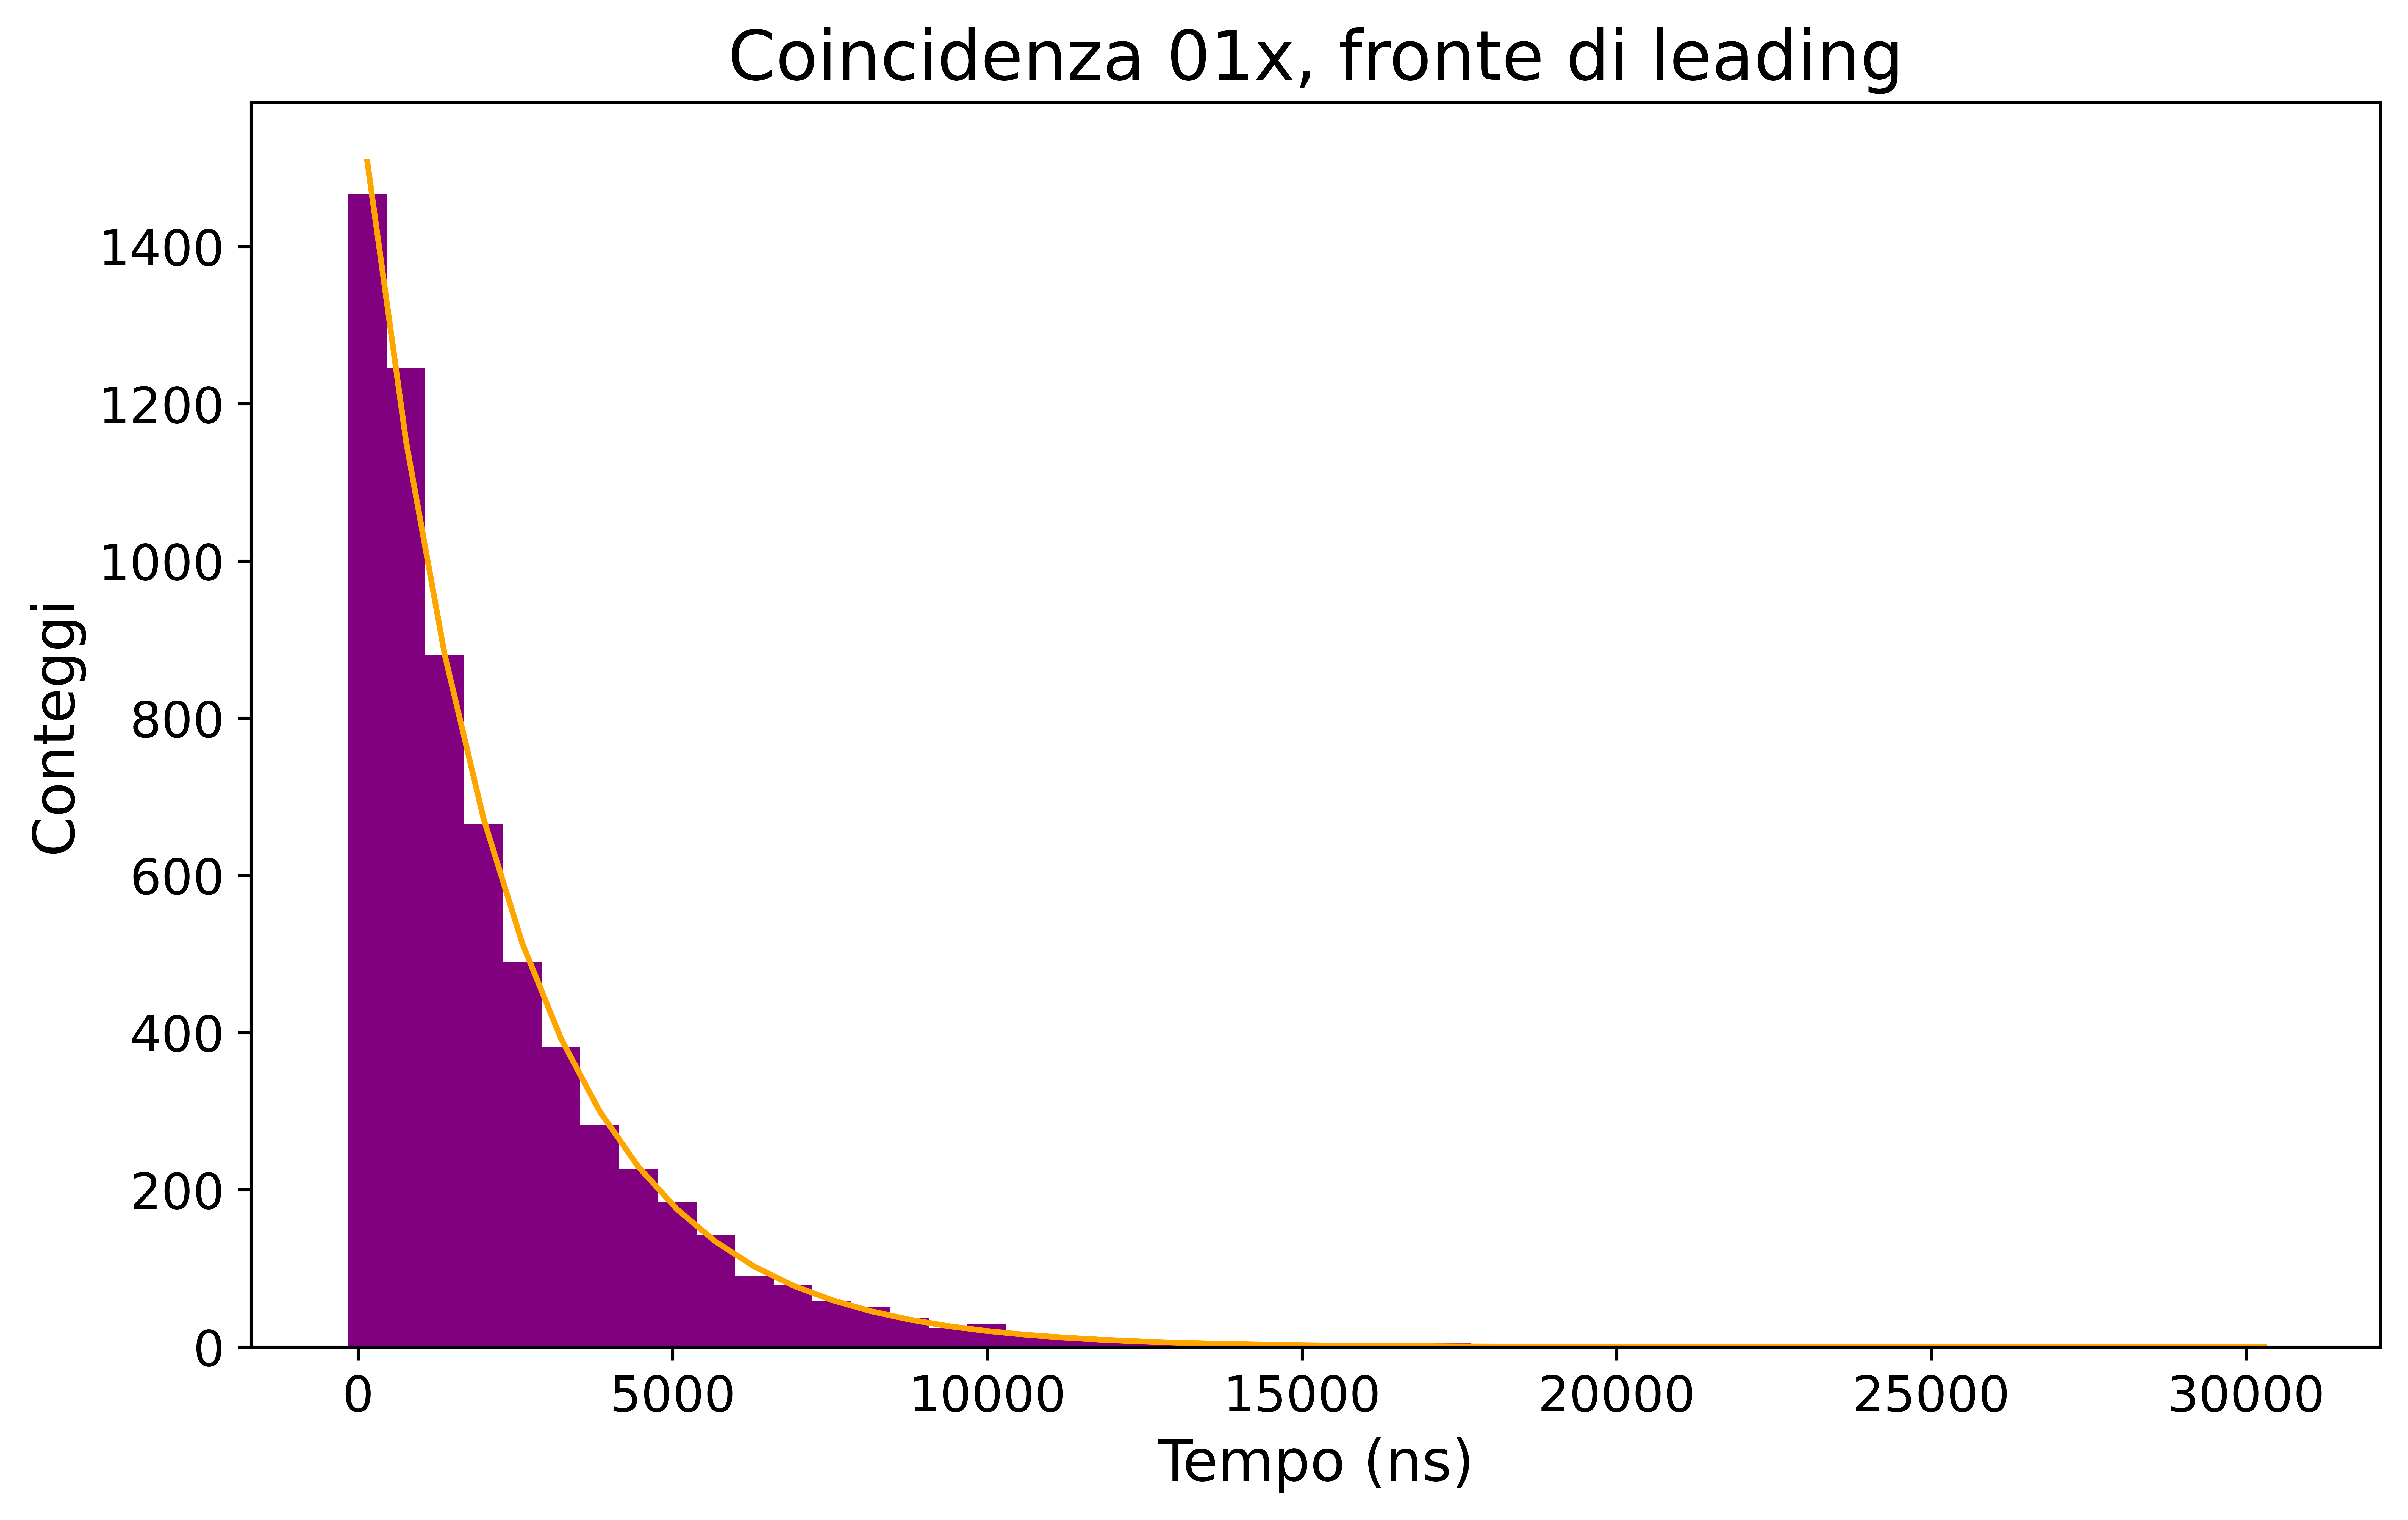

In [156]:
plt.figure(figsize=(10,6), dpi = 1000)
ys, xs , other= plt.hist([i[3] for i in frontselect(dict_tot[8],0)], bins = 50, color = "purple")
N = sum(ys)
errs = []
for i in ys:
    if i !=0:
        errs.append(np.sqrt((i)*(1-i/N)))
    else:
        errs.append(.1)
params, cov = curve_fit(f = exp,xdata = fromhist(xs),ydata = ys, p0= (N, 2000,10), sigma = errs, absolute_sigma = True)
#plt.yscale("log")
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
model = [exp(i, *params) for i in fromhist(xs)]
plt.plot(fromhist(xs), model, color = "orange"
        )
plt.title("Coincidenza 01x, fronte di leading", fontsize = 18)
least_squares = LeastSquares(ys[:], fromhist(xs)[:], [3+np.sqrt(i) for i in ys[:]], exp)
#m= Minuit(least_squares, a=1000,b= 10, c=3)
#m.migrad()  # finds minimum of least_squares function
#m.hesse()
#plt.plot(fromhist(xs), [exp(i, *m.values) for i in fromhist(xs)], label="fit")


In [157]:
np.mean([i[3] for i in frontselect(dict_tot[8])])

2271.377427640763

In [158]:
params

array([1.60994168e+03, 2.28548190e+03, 4.09487504e-02])

In [159]:
cov

array([[ 6.41728212e+02, -4.82567356e+02,  6.75967841e-02],
       [-4.82567356e+02,  7.96049997e+02, -1.51285110e-01],
       [ 6.75967841e-02, -1.51285110e-01,  3.18889947e-03]])

In [160]:
coinc_110 =frontselect(dict_tot[6],1)


(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

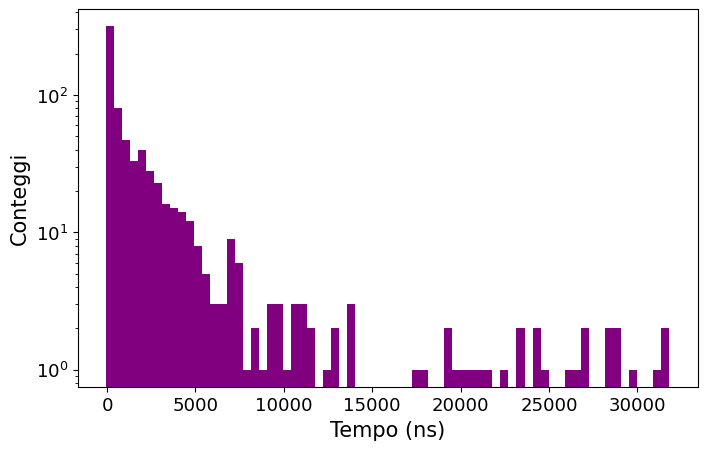

In [161]:
plt.figure(figsize=(8,5), dpi = 100)
ysc, xsc, otherc = plt.hist([i[3] for  i in coinc_110], bins = 70, color = "purple")
plt.yscale("log")
N = sum(ysc)
err = []
for i in ysc:
    if i !=0:
        err.append(np.sqrt((i)*(1-i/N)))
    else:
        err.append(1)
params, cov = curve_fit(f = exp,xdata = fromhist(xsc)[1:],ydata = ysc[1:], p0= (N, 2000,10), sigma = err[1:])
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)


In [162]:
params

array([9.08916570e+01, 1.97396236e+03, 6.05193072e-01])

In [163]:
cov

array([[ 4.44633732e+01, -5.68190078e+02,  1.28297732e-01],
       [-5.68190078e+02,  1.16868934e+04, -4.31795406e+00],
       [ 1.28297732e-01, -4.31795406e+00,  1.60775125e-02]])

## More than one event


In [164]:
multiple_event ={} #up to two events
multiple_events = {} #more than two events
c= 0 
front_3_trailing = frontselect(dict_tot[3],1)
for i in range(len(front_3_trailing)-1):
    if front_3_trailing[i][0]  == front_3_trailing[i+1][0]:
        n = front_3_trailing[i][0]
        #print(c)
        if c ==0: 
            multiple_event[n] = [front_3_trailing[i]]
            multiple_event[n].append(front_3_trailing[i+1])
            #print(multiple_event[n])
            c+=1
        elif c ==1:
            memory = multiple_event[n]
            #print("memory = "+ str(memory))
            
            multiple_events[n] = memory
            multiple_events[n].append(front_3_trailing[i+1])
            del multiple_event[n]
            c+=1
        else:
            print(n)
            
            multiple_events[n].append(front_3_trailing[i+1])
    else:
        c=0
        
    
        
    

In [165]:
delta_t_csi = []
for i in multiple_event.keys():
    delta_t_csi.append(multiple_event[i][1][3]-multiple_event[i][0][3])

In [166]:
def cexp(x, t,b,c):
    return b*(1-np.exp(-x/t))+c*x

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

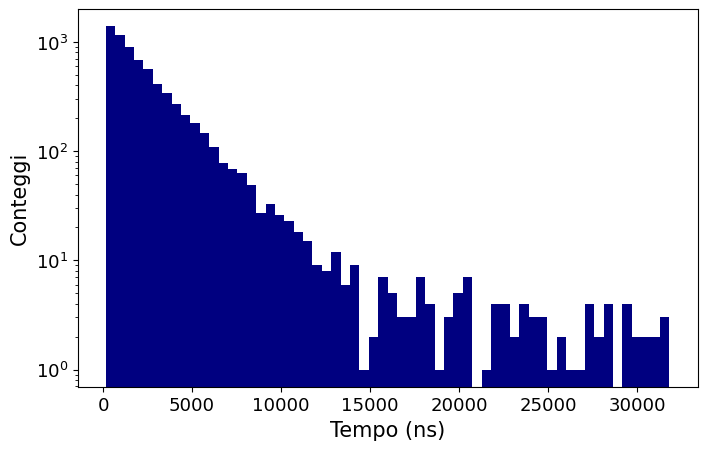

In [167]:
plt.figure(figsize=(8,5), dpi = 100)

ydcsi, xdcsi , otherdcsi = plt.hist(delta_t_csi, bins = 60, cumulative = False, color = "navy")
pdcsi, cdcsi =curve_fit(exp, fromhist(xdcsi)[1:], ydcsi[1:], (1000,2000,10))
plt.yscale("log")
#def LSQ(a,b,c):
#    return np.sum((ydcsi-exp(fromhist(xdcsi),a,b,c))**2/([1+np.sqrt(i) for i in ydcsi[:]])**2)
#least_squares = LeastSquares(ydcsi[:20], fromhist(xdcsi)[:20], [1+np.sqrt(i) for i in ydcsi[:20]], exp)
#m= Minuit(least_squares, a=30000,b= 2000, c=3)
#m.migrad()
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

In [168]:
cdcsi

array([[ 137.39679895, -158.89141878,    1.67016062],
       [-158.89141878,  262.74061965,   -6.22437543],
       [   1.67016062,   -6.22437543,    0.90527545]])